In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Training data exploration & Preprocessing

In [2]:
# #Load random sample from train.csv
# import random

# filename = 'Data\\train.csv'
# n = sum(1 for line in open(filename)) - 1 #number of records in file
# s = 200000 #sample size
# skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
# train_data = pd.read_csv(filename, skiprows=skip)
# train_data.to_csv('Data\\train_data_sample.csv', index=False)

In [3]:
train_data = pd.read_csv('Data\\train_data_sample.csv')

In [4]:
#Load features.csv
features = pd.read_csv('Data\\features.csv')

In [5]:
#Load test set
test = pd.read_csv('Data\\example_test.csv')

### Training data

In [6]:
train_data.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.119056,-0.005066,-0.006115,0.014734,0.019784,0.005082,1,-0.303130,-1.578560,...,NaN,5.583801,4.801788,4.647657,5.386426,6.572489,4.751286,6.170338,4.625856,26
1,0,4.826216,-0.005051,-0.005869,-0.011151,-0.011527,-0.010873,-1,-0.661124,-1.602908,...,NaN,0.325940,1.448772,0.326455,2.402899,0.459243,1.758362,0.300931,1.299309,60
2,0,0.000000,0.000810,0.002753,0.002360,-0.009204,-0.013806,1,0.277467,-0.699775,...,NaN,-0.372628,0.306680,-0.007075,1.796079,-0.207395,0.907633,-0.404908,0.315174,72
3,0,0.000000,-0.000891,0.000177,-0.011862,-0.028601,-0.021438,-1,-0.869530,-1.453809,...,NaN,0.627782,1.814306,1.214343,4.424494,1.203140,2.697905,0.644295,1.663593,82
4,0,0.652202,-0.040187,-0.044206,-0.002860,0.041875,0.014827,1,0.968028,-1.068253,...,NaN,3.659459,1.121470,5.038342,3.678327,5.495690,2.013741,3.880073,0.896260,93


In [7]:
train_data.shape

(200000, 138)

In [8]:
train_data[train_data['weight']==0].shape

(34123, 138)

In [9]:
#Create copy of raw training dataset
train_data_ = train_data.copy()

In [10]:
#train_data_ = train_data_[train_data_['weight']!=0] #Remove records with weight=0

In [11]:
train_data_.shape

(200000, 138)

In [12]:
len(train_data_)/len(train_data)

1.0

NAs:

In [13]:
train_nan = pd.DataFrame((train_data.isna().sum()/len(train_data)*100).sort_values(ascending=False),columns=['pct_NaN'])

In [14]:
test_ = test[test['weight']!=0] #remove records with weight=0 from test set

In [15]:
nan_pct = pd.merge(train_nan, pd.DataFrame((test_.isna().sum()/len(test_)*100).sort_values(ascending=False),columns=['pct_NaN']),left_index=True, right_index=True).rename(columns={'pct_NaN_x':'pct_NaN_train', 'pct_NaN_y':'pct_NaN_test'})
nan_pct.head(30)

,pct_NaN_train,pct_NaN_test
feature_28,16.5840,13.322578
feature_27,16.5840,13.322578
feature_18,16.5840,13.322578
feature_17,16.5840,13.322578
feature_7,16.4815,13.280122
feature_8,16.4815,13.280122
feature_96,14.7300,12.312134
feature_108,14.7300,12.312134
feature_114,14.7300,12.312134
feature_102,14.7300,12.312134


In [16]:
#Remove features with high ratio of nan entries
features_remove = nan_pct[(nan_pct['pct_NaN_train']>10)|(nan_pct['pct_NaN_test']>10)].index.values
train_data_ = train_data_.drop(columns=features_remove)

Resp features:

In [17]:
train_data_[['resp_1','resp_2','resp_3','resp_4','resp']]

,resp_1,resp_2,resp_3,resp_4,resp
0,-0.005066,-0.006115,0.014734,0.019784,0.005082
1,-0.005051,-0.005869,-0.011151,-0.011527,-0.010873
2,0.000810,0.002753,0.002360,-0.009204,-0.013806
3,-0.000891,0.000177,-0.011862,-0.028601,-0.021438
4,-0.040187,-0.044206,-0.002860,0.041875,0.014827
...,...,...,...,...,...
199995,0.003917,0.005364,0.006211,0.004496,0.003479
199996,-0.003855,-0.002706,-0.008226,-0.023143,-0.020925
199997,-0.000145,-0.000145,0.002932,0.006885,0.003483
199998,0.000387,0.000387,0.004330,0.009365,0.005083


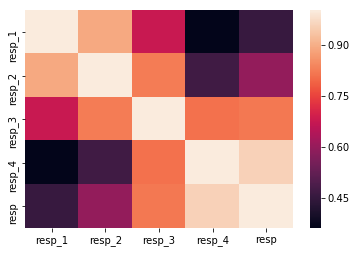

In [18]:
import seaborn as sns

sns.heatmap(train_data_[['resp_1','resp_2','resp_3','resp_4','resp']].corr())
plt.show()

### Features

In [19]:
features.head()

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,feature_1,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,feature_2,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,feature_3,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,feature_4,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [20]:
features = features.set_index('feature')

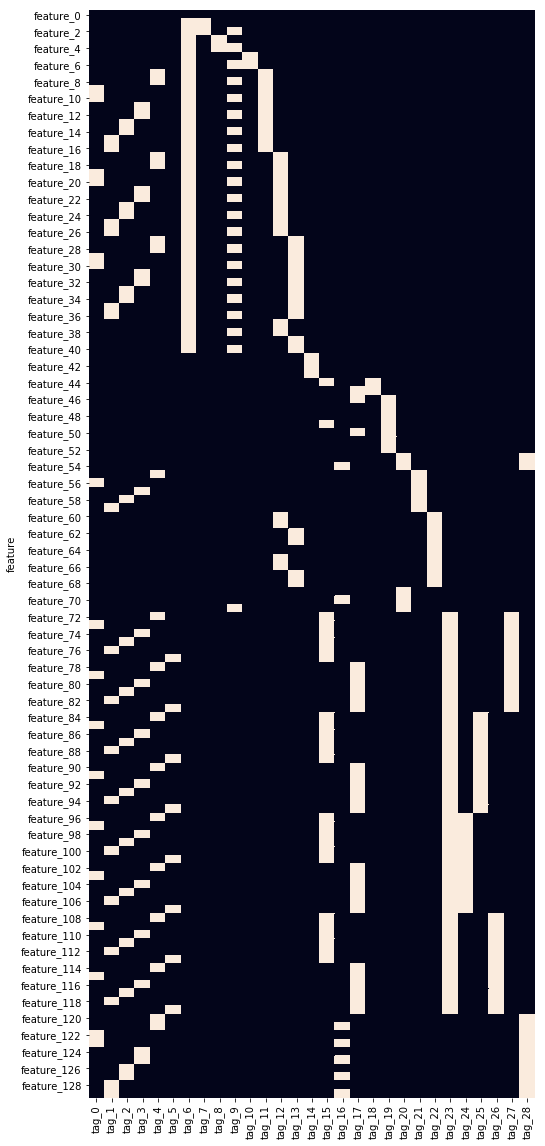

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,20))     
sns.heatmap(features*1,cbar=False)
plt.show()

### Feature Histograms

C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


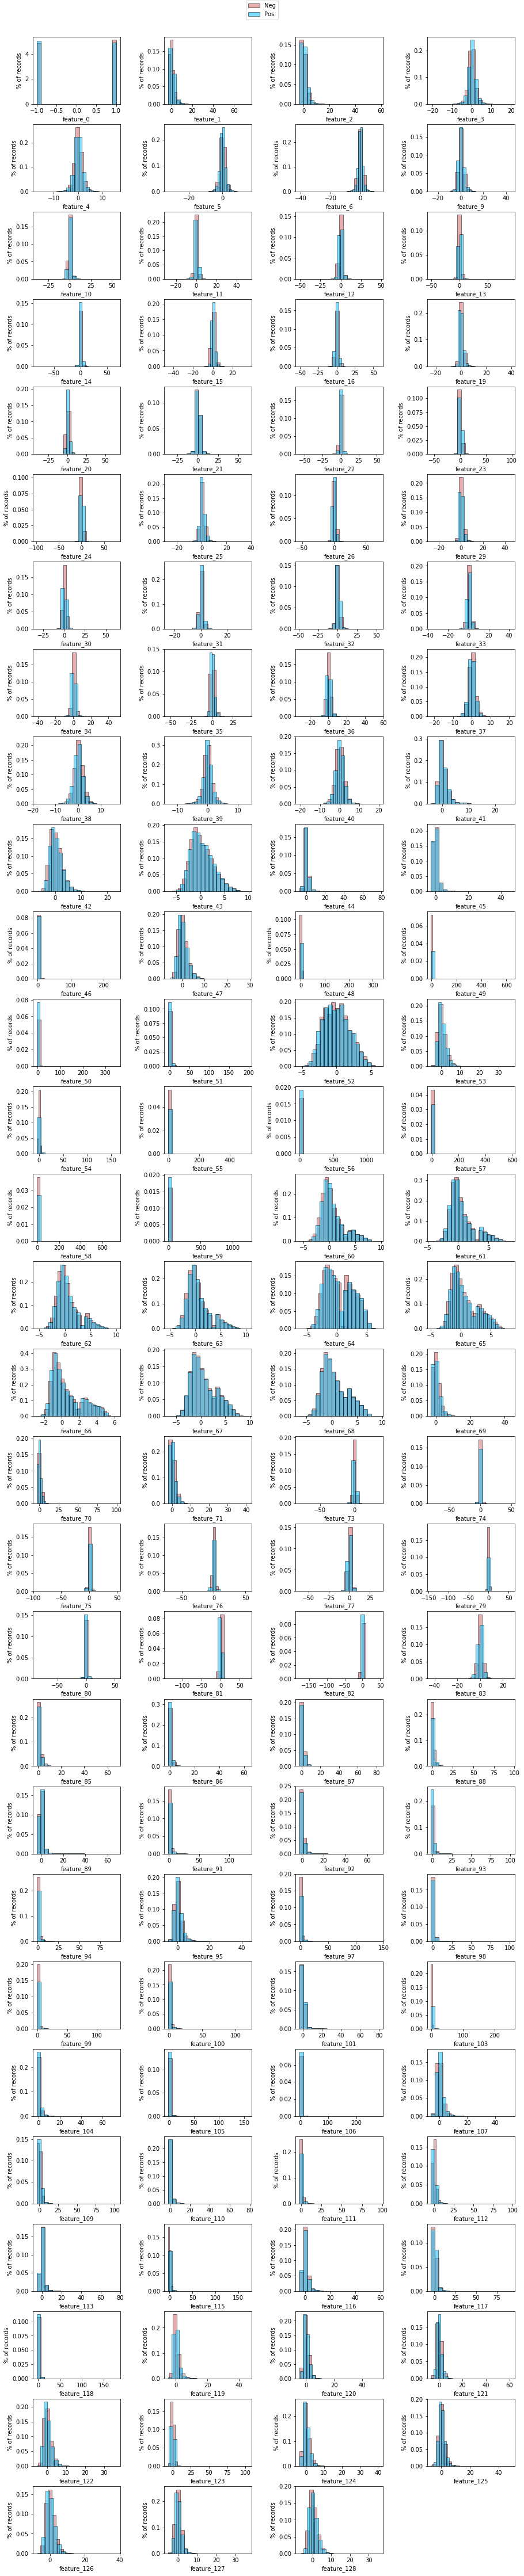

In [22]:
train_data_pos = train_data_[train_data_['resp']>0].iloc[:,7:-2]
train_data_neg = train_data_[train_data_['resp']<0].iloc[:,7:-2]

# set up figure
fig = plt.figure(figsize=(15,80))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.3)

# plot histogram for each features
for i,feature in enumerate(train_data_.iloc[:,7:-2].columns.values):
    ax = fig.add_subplot(33,4,i+1)
    
    pos_feature = train_data_pos[feature].values
    neg_feature = train_data_neg[feature].values
    
    ax.hist(neg_feature,alpha=0.5,bins=20,color='indianred',edgecolor='black',density=True,label='Neg')
    ax.hist(pos_feature,alpha=0.5,bins=20,color='deepskyblue',edgecolor='black',density=True,label='Pos')

    ax.set_xlabel(feature)
    ax.set_ylabel('% of records')   

# Add legend
h, l = ax.get_legend_handles_labels()
fig.legend(h, l, loc="upper center",borderaxespad=0.1)
    
plt.subplots_adjust(top=0.99)
plt.show()

Find and remove outliers:

In [23]:
def outlier_detector(x, k=1.5):
    #Find outliers using Tukey's fences method
    Q1 = np.nanquantile(x,0.25)
    Q3 = np.nanquantile(x,0.75)
    outliers = list(x[x<Q1-k*(Q3-Q1)].index.values)
    outliers = outliers + list(x[x>Q3+k*(Q3-Q1)].index.values)
    return outliers

In [24]:
k = 5 #outlier detection constant

In [25]:
pct_outliers = []
for feature in train_data_.iloc[:,7:-2].columns.values:
    n_outliers = len(outlier_detector(train_data_[feature],k=k))/len(train_data_[feature])*100
    pct_outliers.append(n_outliers)
pct_outliers = pd.DataFrame(pct_outliers, index=train_data_.iloc[:,7:-2].columns.values)

In [26]:
pct_outliers.rename(columns={0:'pct_outliers'}).sort_values(by='pct_outliers',ascending=False)

,pct_outliers
feature_56,2.1020
feature_55,1.7230
feature_57,1.5295
feature_86,1.5285
feature_110,1.4935
...,...
feature_61,0.0000
feature_60,0.0000
feature_52,0.0000
feature_43,0.0000


In [27]:
#Find records with outliers on any feature
outliers = []
for feature in train_data_.iloc[:,7:-2].columns.values:
    outliers = outliers + outlier_detector(train_data_[feature],k=k)
outliers = list(set(outliers))

In [28]:
#Remove outliers from dataset (from dataset that already excludes columns with too many NaNs)
train_data_clean = train_data_.loc[~train_data_.index.isin(outliers)]

In [29]:
len(train_data_clean)/len(train_data_)

0.887515

Re-plot histograms after removing outliers

C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


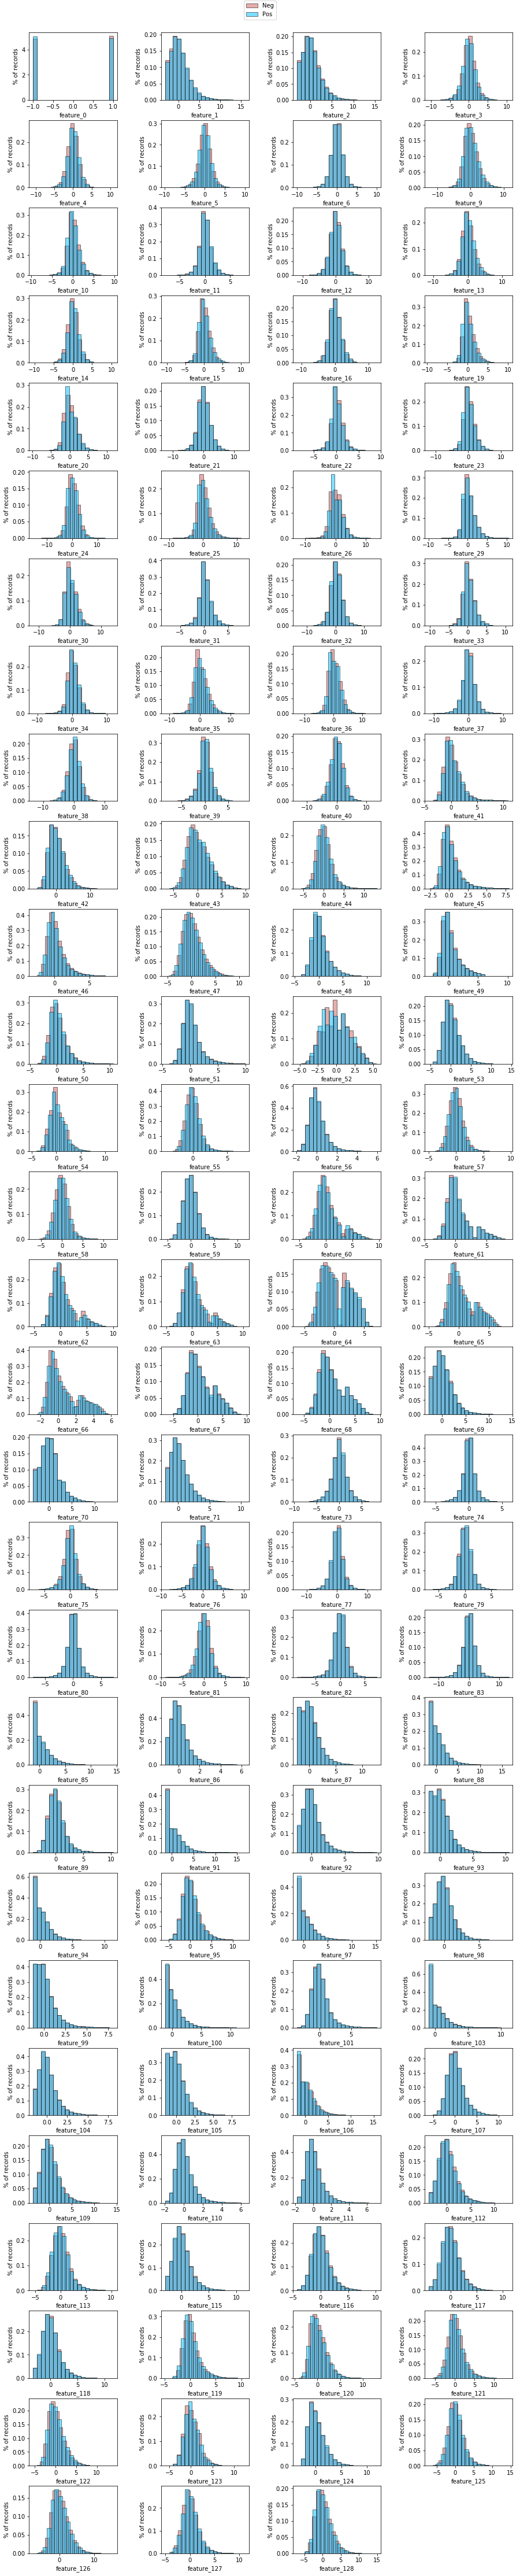

In [30]:
train_data_pos = train_data_clean[train_data_clean['resp']>0].iloc[:,7:-2]
train_data_neg = train_data_clean[train_data_clean['resp']<0].iloc[:,7:-2]

# set up figure
fig = plt.figure(figsize=(15,70))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.3)

# plot histogram for each features
for i,feature in enumerate(train_data_clean.iloc[:,7:-2].columns.values):
    ax = fig.add_subplot(29,4,i+1)
    
    pos_feature = train_data_pos[feature].values
    neg_feature = train_data_neg[feature].values
    
    ax.hist(neg_feature,alpha=0.5,bins=20,color='indianred',edgecolor='black',density=True,label='Neg')
    ax.hist(pos_feature,alpha=0.5,bins=20,color='deepskyblue',edgecolor='black',density=True,label='Pos')

    ax.set_xlabel(feature)
    ax.set_ylabel('% of records')   

# Add legend
h, l = ax.get_legend_handles_labels()
fig.legend(h, l, loc="upper center",borderaxespad=0.1)
    
plt.subplots_adjust(top=0.99)
plt.show()

In [31]:
#Split features and y/resp
X = train_data_clean.iloc[:,7:-2]
y = train_data_clean['resp']

In [32]:
#One hot encode feature_0 (categorical)
one_hot = pd.get_dummies(X['feature_0']).rename(columns={-1:'feature_0_neg',1:'feature_0_pos'})
X = X.drop(columns=['feature_0']).join(one_hot)

In [33]:
#Remove rows with NaNs
X_clean = X.dropna()
y_clean = y.loc[~y.index.isin(X[X.isnull().any(axis=1)].index.values)]
len(X_clean)/len(X)

0.9587161907122697

In [34]:
#Standardise features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_clean.iloc[:,:-2])
X_norm = scaler.transform(X_clean.iloc[:,:-2])
X_norm = pd.DataFrame(X_norm, index=X_clean.index.values, columns=X_clean.columns.values[:-2])
#Add one-hot encoded feature_0
X_norm = X_norm.merge(X_clean.iloc[:,-2:],left_index=True, right_index=True)

In [35]:
X_norm.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_9,feature_10,feature_11,feature_12,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_0_neg,feature_0_pos
count,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,...,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,1.701750e+05,170175.000000,170175.000000
mean,5.271063e-16,1.063407e-15,8.917666e-17,2.031511e-17,8.716221e-17,6.022834e-17,1.724002e-16,-2.553758e-17,4.330897e-17,4.130349e-17,...,1.256449e-16,1.764803e-16,-4.647892e-16,-4.573042e-16,1.834037e-16,5.287839e-17,2.168352e-17,6.616975e-17,0.497594,0.502406
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.499996,0.499996
min,-1.490093e+00,-1.537293e+00,-5.915154e+00,-6.555979e+00,-6.185043e+00,-6.412345e+00,-5.897936e+00,-6.697484e+00,-6.188448e+00,-6.229212e+00,...,-3.390406e+00,-2.843962e+00,-3.597682e+00,-2.303301e+00,-3.556579e+00,-3.184406e+00,-3.235704e+00,-3.272242e+00,0.000000,0.000000
25%,-6.872913e-01,-6.924751e-01,-5.669106e-01,-5.860488e-01,-5.552312e-01,-5.560109e-01,-6.652637e-01,-6.196555e-01,-5.500630e-01,-6.000269e-01,...,-6.589899e-01,-7.110759e-01,-6.565042e-01,-7.331433e-01,-6.585345e-01,-7.184058e-01,-6.484590e-01,-7.133483e-01,0.000000,0.000000
50%,-1.411672e-01,-1.287811e-01,-6.643737e-03,-1.417821e-03,3.421300e-03,1.106722e-02,-9.797431e-02,-9.116479e-02,-5.861944e-02,-1.267312e-02,...,-1.191061e-01,-1.619635e-01,-1.250192e-01,-1.938769e-01,-8.750439e-02,-1.315950e-01,-1.053280e-01,-1.449090e-01,0.000000,1.000000
75%,5.140237e-01,5.397982e-01,5.692303e-01,5.943220e-01,5.684927e-01,5.690534e-01,5.742610e-01,5.402299e-01,5.121103e-01,5.897551e-01,...,5.228177e-01,5.304052e-01,5.986241e-01,5.389029e-01,5.595385e-01,5.828663e-01,5.556169e-01,5.553878e-01,1.000000,1.000000
max,6.713449e+00,6.983337e+00,5.905849e+00,6.609225e+00,6.297998e+00,6.436849e+00,5.261162e+00,6.676999e+00,6.101754e+00,6.622327e+00,...,6.601783e+00,6.856972e+00,7.281666e+00,6.977546e+00,7.076194e+00,6.215748e+00,7.009147e+00,6.621074e+00,1.000000,1.000000


In [36]:
len(X_norm)/len(train_data)

0.850875

Pairwise correlation with resp:

In [37]:
corr = pd.DataFrame(X_norm.corrwith(y)).rename(columns={0:'corr'})
corr['abs_corr'] = abs(corr['corr'])
corr = corr.sort_values(by='abs_corr', ascending=False)
corr

,corr,abs_corr
feature_31,0.033515,0.033515
feature_33,0.029827,0.029827
feature_39,0.027253,0.027253
feature_37,-0.025634,0.025634
feature_35,0.023708,0.023708
...,...,...
feature_62,0.000272,0.000272
feature_123,-0.000228,0.000228
feature_127,0.000194,0.000194
feature_112,-0.000161,0.000161


Plot heatmap of features and tags, coloured based on the pairwise correlation of each feature with resp:

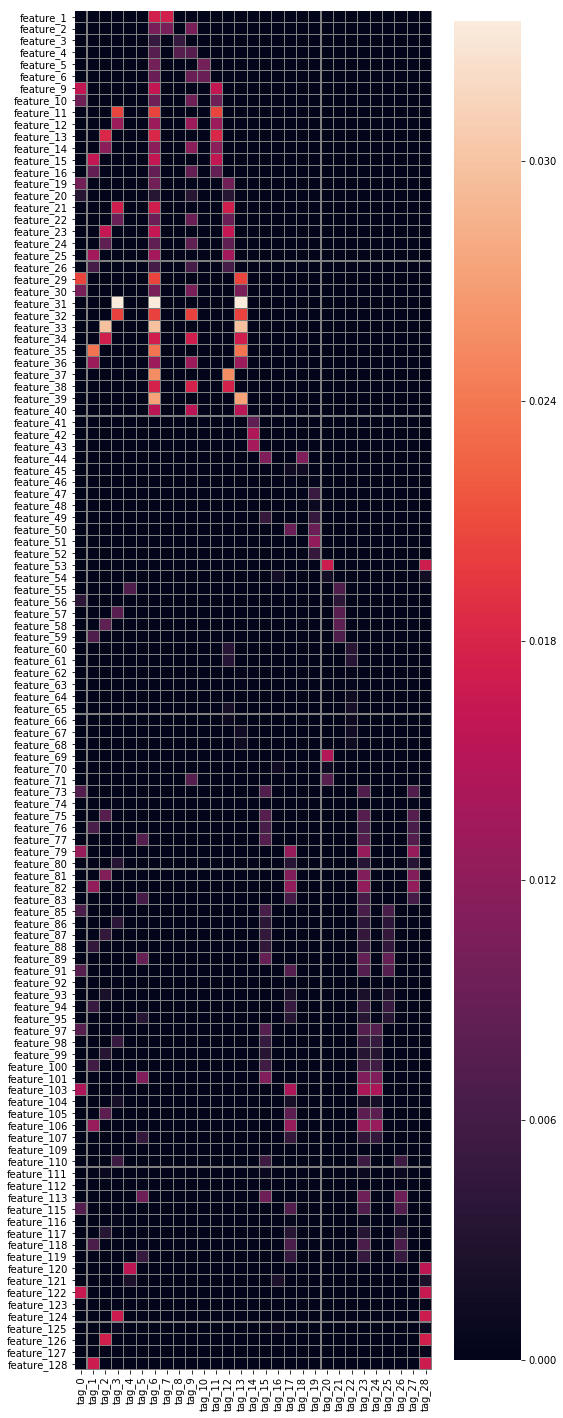

In [38]:
features_corr = (features*1).mul(corr['abs_corr'],axis=0).fillna(0).drop(['feature_0','feature_0_neg','feature_0_pos'])
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,25))     
sns.heatmap(features_corr.loc[X_norm.columns.values[:-2]],cbar=True, linewidths=0.05, linecolor='gray')
plt.show()

In [39]:
#Sum of correlation scores by tag
features_corr.sum(axis=0).sort_values(ascending=False)

tag_6     0.510372
tag_23    0.232829
tag_13    0.214500
tag_9     0.197797
tag_2     0.168437
tag_3     0.159764
tag_1     0.158426
tag_0     0.151908
tag_17    0.138857
tag_12    0.136860
tag_15    0.120425
tag_11    0.113208
tag_28    0.105370
tag_27    0.073879
tag_24    0.073855
tag_5     0.055017
tag_25    0.046677
tag_20    0.042352
tag_26    0.038418
tag_19    0.036965
tag_14    0.036727
tag_21    0.033584
tag_7     0.027834
tag_4     0.024857
tag_10    0.019073
tag_22    0.014777
tag_8     0.012400
tag_18    0.012275
tag_16    0.006781
dtype: float64

In [40]:
#Average correlation score by tag
features_corr.replace(0,np.NaN).mean(axis=0).sort_values(ascending=False)

tag_13    0.015321
tag_6     0.015011
tag_11    0.014151
tag_7     0.013917
tag_14    0.012242
tag_9     0.010989
tag_2     0.009908
tag_1     0.009902
tag_12    0.009776
tag_28    0.009579
tag_10    0.009536
tag_3     0.009398
tag_0     0.008936
tag_20    0.008470
tag_4     0.008286
tag_27    0.007388
tag_24    0.007386
tag_5     0.006877
tag_21    0.006717
tag_8     0.006200
tag_18    0.006138
tag_17    0.006037
tag_23    0.005821
tag_15    0.005474
tag_19    0.005281
tag_25    0.004668
tag_26    0.003842
tag_22    0.001642
tag_16    0.001130
dtype: float64

In [41]:
corr[corr['abs_corr']>=corr['abs_corr'].quantile(0.75)].index.values

array(['feature_31', 'feature_33', 'feature_39', 'feature_37',
       'feature_35', 'feature_29', 'feature_11', 'feature_32',
       'feature_13', 'feature_38', 'feature_1', 'feature_126',
       'feature_21', 'feature_34', 'feature_53', 'feature_128',
       'feature_124', 'feature_0_neg', 'feature_0_pos', 'feature_122',
       'feature_23', 'feature_9', 'feature_15', 'feature_120',
       'feature_40', 'feature_69', 'feature_42', 'feature_103',
       'feature_43'], dtype=object)

In [42]:
#Selected features with at least one of top x% tags by mean corr
selected_tags = features_corr.replace(0,np.NaN).mean(axis=0).sort_values(ascending=False).index.values[0:int(features_corr.shape[1]/4)]
selected_features = (features[selected_tags]*1).sum(axis=1)
selected_features = selected_features[selected_features>0].index.values

In [43]:
len(selected_features)/len(features)

0.45384615384615384

**PCA**

In [44]:
#Run PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=X_norm.shape[1])

pca.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.19943944, 0.33961967, 0.43190309, 0.50728857, 0.56287774,
       0.60483467, 0.64308929, 0.6784133 , 0.71225641, 0.74508018,
       0.77041293, 0.7924958 , 0.81286538, 0.8314124 , 0.84489767,
       0.85756806, 0.86811619, 0.87832193, 0.88831963, 0.8977141 ,
       0.90425904, 0.910589  , 0.91635865, 0.9219644 , 0.92750143,
       0.93284713, 0.93765186, 0.94204684, 0.94622725, 0.94998441,
       0.95318593, 0.95624654, 0.95897911, 0.96149764, 0.96381827,
       0.96609021, 0.96799442, 0.96981396, 0.97154715, 0.97318036,
       0.97476963, 0.97629395, 0.97779176, 0.9792628 , 0.9804733 ,
       0.98162465, 0.98273663, 0.98383209, 0.98484305, 0.98577623,
       0.9866857 , 0.98757652, 0.98843999, 0.98925381, 0.99000256,
       0.99069548, 0.99135142, 0.99189989, 0.99240819, 0.99290796,
       0.99338971, 0.99385173, 0.9942662 , 0.99467879, 0.99506435,
       0.99539209, 0.99570235, 0.99597994, 0.99624437, 0.99650493,
       0.99675246, 0.9969936 , 0.99721582, 0.99743296, 0.99763

In [46]:
n_keep = 30
np.sum(pca.explained_variance_ratio_[:n_keep])

0.9499844141067463

In [47]:
pca = PCA(n_components=n_keep)
X_pca = pca.fit_transform(X_norm)

In [48]:
X_pca = pd.DataFrame(X_pca,index=X_norm.index)

In [49]:
X_pca.shape

(170175, 30)

In [50]:
components = pd.DataFrame(np.round(pca.components_, 4), columns = list(X_norm.columns))

In [51]:
feature_importance = pd.DataFrame(abs(components).sum(axis=0).sort_values(ascending=False),columns=['PCA_weights_sum'])
feature_importance = feature_importance.merge(corr, left_index=True, right_index=True).drop(columns=['corr'])
feature_importance.rank(axis=0,ascending=False).head(30)

,PCA_weights_sum,abs_corr
feature_44,1.0,39.0
feature_54,2.0,97.0
feature_45,3.0,99.0
feature_56,4.0,85.0
feature_6,5.0,47.0
feature_41,6.0,52.0
feature_98,7.0,78.0
feature_51,8.0,36.0
feature_86,9.0,84.0
feature_12,10.0,32.0


# Prediction

## Classification

Convert y/resp values to classes:

In [52]:
y_clean.describe()

count    170175.000000
mean          0.000301
std           0.025498
min          -0.455317
25%          -0.006935
50%           0.000051
75%           0.007224
max           0.383407
Name: resp, dtype: float64

In [53]:
n_classes = 2

In [54]:
low_pos_threshold = 0.01
low_neg_threshold = -low_pos_threshold

def resp_bands(x):
    if x<0:
        if x>low_neg_threshold:
            label = 'low_neg'
        else:
            label = 'high_neg'
    else:
        if x<low_pos_threshold:
            label = 'low_pos'
        else:
            label = 'high_pos'
    return label

if n_classes == 2:
    #3 classes: neg (i.e. loss), pos (i.e. profit)
    labels = ['neg','pos']
    y_label = y_clean.apply(lambda x: 'neg' if x<0 else 'pos')
elif n_classes == 3:
    #3 classes: neg (i.e. loss), low_pos, high_pos
    labels = ['neg','low_pos','high_pos']
    y_label = y_clean.apply(lambda x: 'neg' if x<0 else ('low_pos' if x<=low_pos_threshold else 'high_pos'))
elif n_classes == 4:
    #4 classes: low_neg, high_neg, low_pos, high_pos
    labels = ['high_neg','low_neg','low_pos','high_pos']
    y_label = y_clean.apply(lambda x: resp_bands(x))

In [55]:
y_clean.to_frame().join(y_label,lsuffix='_value', rsuffix='_label').head(20)

,resp_value,resp_label
8,0.015400,pos
9,-0.000302,neg
11,-0.009012,neg
12,0.005372,pos
13,0.010264,pos
16,0.007194,pos
17,0.038596,pos
19,-0.001339,neg
20,0.027034,pos
22,0.014784,pos


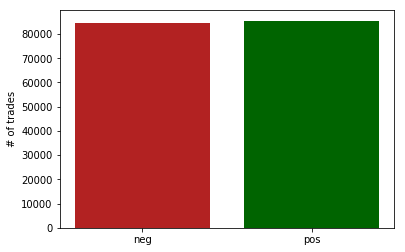

In [56]:
#Bar plot
x = list(range(0,n_classes))
height = [len(y_label[y_label==label]) for label in labels]
if n_classes == 2:
    colors = ['firebrick','darkgreen']
elif n_classes == 3:
    colors = ['firebrick','palegreen','darkgreen']
else:
    colors = ['firebrick','coral','palegreen','darkgreen']

plt.bar(x=x, height=height,color=colors)
plt.xticks(x, labels)
plt.ylabel('# of trades')
plt.show()

Remove class imbalance by undersampling:

In [57]:
X_selected = X_pca

In [58]:
#Find number of samples in class with smallest number of samples 
min_samples = 10**9
for label in y_label.unique():
    min_samples = min(min_samples, len(y_label[y_label==label]))

#Randomly sample indices of samples to be removed from each class
id_drop = []
for label in y_label.unique():
    id_drop.extend(y_label[y_label==label].sample(len(y_label[y_label==label])-min_samples).index.values)

#Remove selected samples
y_label_balanced = y_label.drop(id_drop)
X_balanced = X_selected.drop(id_drop)

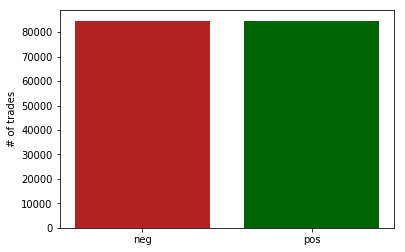

In [59]:
height = [len(y_label_balanced[y_label_balanced==label]) for label in labels]

plt.bar(x=x, height=height,color=colors)
plt.xticks(x, labels)
plt.ylabel('# of trades')
plt.show()

Split data into training and test set:

In [60]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_norm_balanced.loc[:,X_norm_balanced.columns.isin(selected_features)],y_label_balanced,test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_label_balanced,test_size=0.25, random_state=42)

### ML Models

In [61]:
def evaluate_model(train_labels, train_pred, test_labels, test_pred, labels):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    print('Results on training set:')
    print('Accuracy score: ', format(accuracy_score(train_labels, train_pred)))
    print('Precision score: ', format(precision_score(train_labels, train_pred,average=None)))
    print('Recall score: ', format(recall_score(train_labels, train_pred,average=None)))
    print('F1 score: ', format(f1_score(train_labels, train_pred,average=None)))
    print('---------------------------------------------------------------------')
    print('Results on test set:')
    print('Accuracy score: ', format(accuracy_score(test_labels, test_pred)))
    print('Precision score: ', format(precision_score(test_labels, test_pred,average=None)))
    print('Recall score: ', format(recall_score(test_labels, test_pred,average=None)))
    print('F1 score: ', format(f1_score(test_labels, test_pred,average=None)))
    print('---------------------------------------------------------------------')
    
    #Plot confusion matrix for test set
    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(test_labels, test_pred, labels)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix - Test Set') 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

def run_model(models, model_name, train_data, train_labels, test_data, test_labels, label_encoder, labels):
    #model pipeline function
    
    #Get model
    model = models[model_name]
    
    #Fit model to training data
    model.fit(train_data, label_encoder.transform(train_labels.astype(str)))
    
    #Test model's performance on training data
    train_pred = model.predict(train_data)
    train_pred = label_encoder.inverse_transform(train_pred)
    
    #Test model's performance on test data
    test_pred = model.predict(test_data) 
    test_pred = label_encoder.inverse_transform(test_pred)
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    #Print performance metrics
    print(model_name)
    print()
    print(label_encoder.inverse_transform(model.classes_))
    
    evaluate_model(train_labels, train_pred, test_labels, test_pred, labels)
    
    return model

In [62]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

models = dict()

models['Logistic Regression'] = LogisticRegression(solver='lbfgs',max_iter=1000,random_state=42, multi_class='auto')
models['KNN'] = KNeighborsClassifier(n_neighbors=5)
models['Decision Tree'] = DecisionTreeClassifier(random_state=42)
models['Linear SVM'] = SVC(kernel='linear', class_weight='balanced', random_state=42)
models['Cubic SVM'] = SVC(kernel='poly', class_weight='balanced', random_state=42)
for c in np.arange(0.1, 1.1, 0.1):
    models['RBF SVM (C = '+str(c)+')'] = SVC(C=c, class_weight='balanced', random_state=42)
models['Bagging'] = BaggingClassifier(n_estimators=50 ,random_state=42)
models['Gradient Boosting'] = GradientBoostingClassifier(n_estimators=50 ,random_state=42)
models['AdaBoost'] = AdaBoostClassifier(n_estimators=50 ,random_state=42)

In [63]:
#encode training labels to an integer format that is interpretable by all sklearn classification models
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(y_train.values.astype(str))

Logistic Regression

['neg' 'pos']
Results on training set:
Accuracy score:  0.5206683148827614
Precision score:  [0.51958337 0.52189133]
Recall score:  [0.55057153 0.49075474]
F1 score:  [0.53462879 0.50584435]
---------------------------------------------------------------------
Results on test set:
Accuracy score:  0.515849395313681
Precision score:  [0.51470064 0.51714602]
Recall score:  [0.54610767 0.48562255]
F1 score:  [0.52993923 0.50088879]
---------------------------------------------------------------------


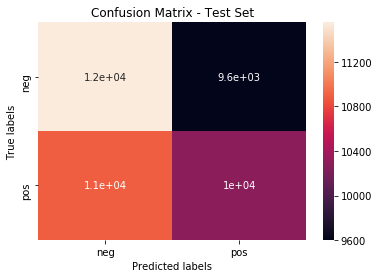

In [64]:
log_model =  run_model(models,'Logistic Regression',X_train,y_train,X_test,y_test,le,labels)

### Neural Nets

In [65]:
#one-hot encode labels
y_train_cat = pd.get_dummies(y_train)
y_test_cat = pd.get_dummies(y_test)

In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(len(labels), activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_48 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_50 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
__________

In [107]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [108]:
#Callback to plot loss while training
from plot_learning import PlotLearning
plot_learning = PlotLearning()

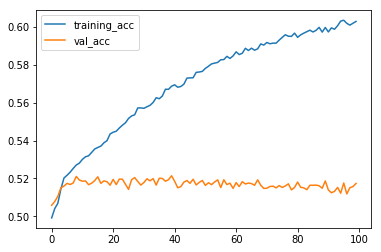

In [109]:
from keras.callbacks import EarlyStopping

epochs = 100
batch_size = 128

hist = model.fit(X_train, y_train_cat, epochs=epochs, batch_size=batch_size, validation_data=[X_test,y_test_cat], callbacks=[plot_learning], verbose=0)
#callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]

In [110]:
#Get predictions on training and test set
y_pred_train = np.argmax(model.predict(X_train),axis=1)
y_pred_test = np.argmax(model.predict(X_test),axis=1)

In [111]:
#Define function to decode the integer predictions back to class names
def decode_one_hot(results, labels):
    predicted_class = []
    for i in range(len(results)):
        predicted_class.append(labels[results[i]])    
    return predicted_class

y_pred_train = decode_one_hot(y_pred_train, y_train_cat.columns.values)
y_pred_test = decode_one_hot(y_pred_test, y_train_cat.columns.values)

['neg' 'pos']
Results on training set:
Accuracy score:  0.6450010235736894
Precision score:  [0.64523858 0.64476396]
Recall score:  [0.64445634 0.6455459 ]
F1 score:  [0.64484722 0.64515469]
---------------------------------------------------------------------
Results on test set:
Accuracy score:  0.5173611111111112
Precision score:  [0.51719388 0.51752655]
Recall score:  [0.51467599 0.52004344]
F1 score:  [0.51593187 0.51878194]
---------------------------------------------------------------------


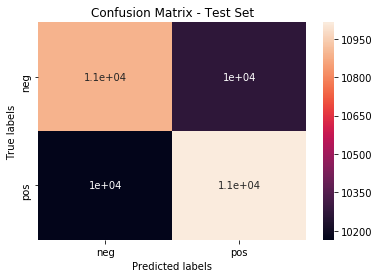

In [112]:
print(y_train_cat.columns.values)
evaluate_model(y_train, y_pred_train, y_test, y_pred_test, labels)